## Numpy05; ufunc, axis , broadcasting

In [3]:
import numpy as np

### ufunc
- R에서 보았던 벡터 연산이라 생각하자
- ndarray객체에 대해서 벡터 연산을 지원한다
- 파이썬 기본 내장 산술 연산자는 거의 다 된다고 생각하자
- 추가적인 함수들은 numpy.org 참고

#### 기본 ufunc

In [12]:
# scalar와 벡터 연산 
ndarray01 = np.array([1,2,3,4,5])

print(ndarray01+2)
print(ndarray01-3)
print(ndarray01/4)
print(ndarray01*2)
print(ndarray01%2)
print(-ndarray01)

[3 4 5 6 7]
[-2 -1  0  1  2]
[0.25 0.5  0.75 1.   1.25]
[ 2  4  6  8 10]
[1 0 1 0 1]
[-1 -2 -3 -4 -5]


In [15]:
# 벡터와 벡터 연산 
ndarray01 = np.array([1,2,3,4,5])

print(ndarray01+ndarray01)
print(ndarray01-ndarray01)
print(ndarray01/ndarray01)
print(ndarray01*ndarray01)
print(ndarray01%ndarray01)


[ 2  4  6  8 10]
[0 0 0 0 0]
[1. 1. 1. 1. 1.]
[ 1  4  9 16 25]
[0 0 0 0 0]


In [18]:
# 비교연산자도 가능하다
ndarray01 = np.array([1,2,3,4,5])
print(ndarray01==1)
print(ndarray01>=1)
print(ndarray01<=1)

[ True False False False False]
[ True  True  True  True  True]
[ True False False False False]


#### 고급 ufunc (집계)

In [4]:
ndarray01 = np.array([1,2,3,4,5])
ndarray01.sum()

print(ndarray01.std())
print(ndarray01.var())
print(ndarray01.mean())
print(ndarray01.min())
print(ndarray01.max())
print(ndarray01.argmax())
print(ndarray01.argmin())

1.4142135623730951
2.0
3.0
1
5
4
0


In [10]:
# any() 하나라도 True면 True
# all() 다 True여야지 True
ndarray01 = np.array([1,2,3,4,5])
bool_mask = ndarray01==1
print(bool_mask)

print(bool_mask.any())
print(bool_mask.all())

[ True False False False False]
True
False


In [5]:
# axis를 갖는 집계 함수
# axis를 따라 집계한다
ndarray01 = np.array([1,2,3,4,5,6]).reshape(2,3)
print(ndarray01)
print(ndarray01.sum())
print(ndarray01.sum(axis=0))
print(ndarray01.sum(axis=1))

[[1 2 3]
 [4 5 6]]
21
[5 7 9]
[ 6 15]


In [16]:
# all() any()
ndarray01 = np.array([1,1,1,1,2,5]).reshape(2,3)
print(ndarray01)

bool_mask = ndarray01==1
print(bool_mask.any(axis=0))
print(bool_mask.all(axis=1))

[[1 1 1]
 [1 2 5]]
[ True  True  True]
[ True False]


### broadcasting
- 두 배열사이의 상호작용을 결정하기 위한 규칙이다 => scalar는 당연히 되지
- 규칙
    - 차원의 수가 적은 배열의 앞쪽을 1로 채운다
    - 차원의 형상이 일치하지 않는 경우 1쪽을 늘린다
    - 일치하지도 않고 차원의 형상이 1도 아니라면 에러발생

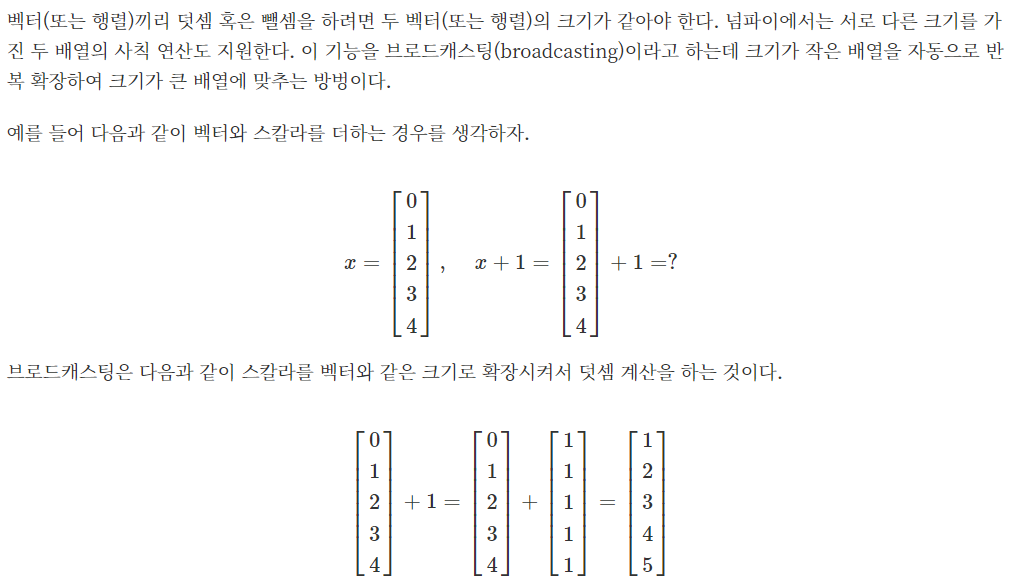

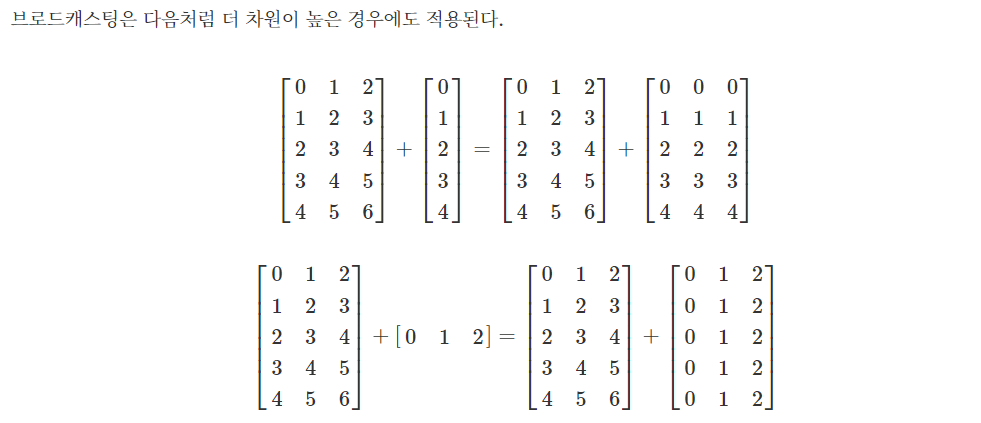

In [23]:
np.ones((3,3)) + np.arange(3)

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

In [24]:
np.ones((3,3)) + np.arange(3).reshape(3,1)

array([[1., 1., 1.],
       [2., 2., 2.],
       [3., 3., 3.]])

In [21]:
np.ones((3,1)) + np.arange(4)

array([[1., 2., 3., 4.],
       [1., 2., 3., 4.],
       [1., 2., 3., 4.]])

### sort
- ndarray.sort() => inplace 발생
- np.sort() => 새로운 ndarray 반환
- 기본적으로 decreasing 옵션이 없다 => [::-1] 로 가능하다 
- matrix
    - axis=0 행을따라 정렬 => 열 정렬
    - axis=1 열을 따라 정렬 => 행 정렬

In [25]:
ary = np.arange(10)
np.random.shuffle(ary)
ary

array([0, 9, 6, 3, 5, 4, 2, 7, 8, 1])

In [26]:
ary = np.arange(10)
np.random.shuffle(ary)
ary.sort()  # inplace가 바로 일어난다
print(ary)

[0 1 2 3 4 5 6 7 8 9]


In [27]:
ary = np.arange(10)
np.random.shuffle(ary)
np.sort(ary) # inplace가 바로 일어나지 않는다
print(ary)

[2 7 3 9 8 6 0 4 1 5]


In [28]:
# 오름차순 : 기본으로 오름차순 정렬 
# 내림차순 : 오름차순 구한후 거꾸로 부르자
ary = np.arange(10)
np.random.shuffle(ary)
ary.sort()
ary[::-1]

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

In [29]:
# 행렬에 대한 정렬
ary = np.random.randint(0,17,size=(4,4))
print(ary)
print(np.sort(ary,axis=1)) # 열을 따라 정렬 => 행정렬
print(np.sort(ary,axis=0)) # 행을 따라 정렬 => 열정렬

[[ 9  9  9 10]
 [ 7  4  7  6]
 [10  6 14  4]
 [ 7  7 15  8]]
[[ 9  9  9 10]
 [ 4  6  7  7]
 [ 4  6 10 14]
 [ 7  7  8 15]]
[[ 7  4  7  4]
 [ 7  6  9  6]
 [ 9  7 14  8]
 [10  9 15 10]]


#### 만약에 정렬된 인덱스를 필요로 한다면 ?

In [30]:
ary = np.array([4,3,5,6])
idx = np.argsort(ary)
print(idx)
print(ary[idx])

[1 0 2 3]
[3 4 5 6]


#### 행렬에서 정렬된 인덱스를 필요로 한다면 ?

In [36]:
ary=np.random.randint(0,17,(4,4))
print(ary)

# 2번째 열을 기준으로 정렬을 하고싶다
print('2번째 열을 기준으로 정렬을 하고싶다')
print(np.argsort(ary[:,1]))
# 행을따라 다시 indexing하면 => 열을 기준으로 정렬이 된다
print(ary[np.argsort(ary[:,1])])


# 2번째 행을 기준으로 정렬을 하고싶다
print('2번째 행을 기준으로 정렬을 하고싶다')
print(np.argsort(ary[1,:]))
# 열을따라 다시 indexing하면 => 행을 기준으로 정렬이 된다
print(ary[:,np.argsort(ary[1,:])])

[[ 6 10 14 12]
 [13 12  5 14]
 [16 13  3  0]
 [12  5  0  2]]
2번째 열을 기준으로 정렬을 하고싶다
[3 0 1 2]
[[12  5  0  2]
 [ 6 10 14 12]
 [13 12  5 14]
 [16 13  3  0]]
2번째 행을 기준으로 정렬을 하고싶다
[2 1 0 3]
[[14 10  6 12]
 [ 5 12 13 14]
 [ 3 13 16  0]
 [ 0  5 12  2]]
